# WGAN-GP 훈련

## 라이브러리 임포트

In [1]:
%matplotlib inline

import os
import matplotlib.pyplot as plt

from models.WGANGP import WGANGP
from utils.loaders import load_celeb

import pickle

Using TensorFlow backend.


In [2]:
# run params
SECTION = 'gan'
RUN_ID = '0003'
DATA_NAME = 'celeb'
RUN_FOLDER = 'run/{}/'.format(SECTION)
RUN_FOLDER += '_'.join([RUN_ID, DATA_NAME])

if not os.path.exists(RUN_FOLDER):
    os.mkdir(RUN_FOLDER)
    os.mkdir(os.path.join(RUN_FOLDER, 'viz'))
    os.mkdir(os.path.join(RUN_FOLDER, 'images'))
    os.mkdir(os.path.join(RUN_FOLDER, 'weights'))

mode =  'build' #'load' #

## 데이터 적재

In [3]:
BATCH_SIZE = 64
IMAGE_SIZE = 64

In [4]:
x_train = load_celeb(DATA_NAME, IMAGE_SIZE, BATCH_SIZE)

Found 202599 images belonging to 2 classes.


In [5]:
x_train[0][0][0]

array([[[-0.99215686, -0.99215686, -0.99215686],
        [-0.99215686, -0.99215686, -0.99215686],
        [-0.99215686, -0.99215686, -0.99215686],
        ...,
        [-0.9764706 , -0.9764706 , -0.9764706 ],
        [-0.9764706 , -0.9764706 , -0.9764706 ],
        [-0.9764706 , -0.9764706 , -0.9764706 ]],

       [[-0.99215686, -0.99215686, -0.99215686],
        [-0.99215686, -0.99215686, -0.99215686],
        [-0.99215686, -0.99215686, -0.99215686],
        ...,
        [-0.9764706 , -0.9764706 , -0.9764706 ],
        [-0.9764706 , -0.9764706 , -0.9764706 ],
        [-0.9764706 , -0.9764706 , -0.9764706 ]],

       [[-0.99215686, -0.99215686, -0.99215686],
        [-0.99215686, -0.99215686, -0.99215686],
        [-0.99215686, -0.99215686, -0.99215686],
        ...,
        [-0.9764706 , -0.9764706 , -0.9764706 ],
        [-0.9764706 , -0.9764706 , -0.9764706 ],
        [-0.9764706 , -0.9764706 , -0.9764706 ]],

       ...,

       [[ 0.05098039, -0.14509805, -0.46666667],
        [ 0

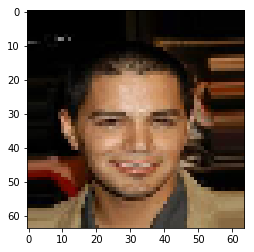

In [6]:
plt.imshow((x_train[0][0][0]+1)/2)

## 모델 생성

In [7]:
gan = WGANGP(input_dim = (IMAGE_SIZE,IMAGE_SIZE,3)
        , critic_conv_filters = [64,128,256,512]
        , critic_conv_kernel_size = [5,5,5,5]
        , critic_conv_strides = [2,2,2,2]
        , critic_batch_norm_momentum = None
        , critic_activation = 'leaky_relu'
        , critic_dropout_rate = None
        , critic_learning_rate = 0.0002
        , generator_initial_dense_layer_size = (4, 4, 512)
        , generator_upsample = [1,1,1,1]
        , generator_conv_filters = [256,128,64,3]
        , generator_conv_kernel_size = [5,5,5,5]
        , generator_conv_strides = [2,2,2,2]
        , generator_batch_norm_momentum = 0.9
        , generator_activation = 'leaky_relu'
        , generator_dropout_rate = None
        , generator_learning_rate = 0.0002
        , optimiser = 'adam'
        , grad_weight = 10
        , z_dim = 100
        , batch_size = BATCH_SIZE
        )

if mode == 'build':
    gan.save(RUN_FOLDER)

else:
    gan.load_weights(os.path.join(RUN_FOLDER, 'weights/weights.h5'))

Instructions for updating:
Colocations handled automatically by placer.


In [8]:
gan.critic.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
critic_input (InputLayer)    (None, 64, 64, 3)         0         
_________________________________________________________________
critic_conv_0 (Conv2D)       (None, 32, 32, 64)        4864      
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 32, 32, 64)        0         
_________________________________________________________________
critic_conv_1 (Conv2D)       (None, 16, 16, 128)       204928    
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 16, 16, 128)       0         
_________________________________________________________________
critic_conv_2 (Conv2D)       (None, 8, 8, 256)         819456    
_________________________________________________________________
leaky_re_lu_3 (LeakyReLU)    (None, 8, 8, 256)         0         
__________

In [9]:
gan.generator.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
generator_input (InputLayer) (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 8192)              827392    
_________________________________________________________________
batch_normalization_1 (Batch (None, 8192)              32768     
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 8192)              0         
_________________________________________________________________
reshape_1 (Reshape)          (None, 4, 4, 512)         0         
_________________________________________________________________
generator_conv_0 (Conv2DTran (None, 8, 8, 256)         3277056   
_________________________________________________________________
batch_normalization_2 (Batch (None, 8, 8, 256)         1024      
__________

In [10]:
gan.critic_model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 100)          0                                            
__________________________________________________________________________________________________
input_1 (InputLayer)            (None, 64, 64, 3)    0                                            
__________________________________________________________________________________________________
model_2 (Model)                 (None, 64, 64, 3)    5168003     input_2[0][0]                    
__________________________________________________________________________________________________
random_weighted_average_1 (Rand (None, 64, 64, 3)    0           input_1[0][0]                    
                                                                 model_2[1][0]                    
__________

/home/haesun/github/GDL_code/env/lib/python3.7/site-packages/keras/engine/training.py:490: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


## 모델 훈련

In [10]:
EPOCHS = 6000
PRINT_EVERY_N_BATCHES = 5
N_CRITIC = 5
BATCH_SIZE = 64

In [11]:
gan.train(     
    x_train
    , batch_size = BATCH_SIZE
    , epochs = EPOCHS
    , run_folder = RUN_FOLDER
    , print_every_n_batches = PRINT_EVERY_N_BATCHES
    , n_critic = N_CRITIC
    , using_generator = True
)

Instructions for updating:
Use tf.cast instead.


/home/haesun/github/GDL_code/env/lib/python3.7/site-packages/keras/engine/training.py:490: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


0 (5, 1) [D loss: (1.0)(R -3.5, F -1.3, G 0.6)] [G loss: 2.5]
1 (5, 1) [D loss: (-66.7)(R -87.1, F -10.1, G 3.1)] [G loss: 6.4]
2 (5, 1) [D loss: (-122.9)(R -206.2, F 15.1, G 6.8)] [G loss: -14.2]
3 (5, 1) [D loss: (-120.7)(R -217.9, F 16.6, G 8.1)] [G loss: -11.7]
4 (5, 1) [D loss: (-135.9)(R -195.2, F 6.5, G 5.3)] [G loss: -18.7]
5 (5, 1) [D loss: (-130.0)(R -204.2, F 11.5, G 6.3)] [G loss: -16.2]
6 (5, 1) [D loss: (-141.2)(R -219.0, F 5.5, G 7.2)] [G loss: -29.8]
7 (5, 1) [D loss: (-140.4)(R -214.9, F 7.2, G 6.7)] [G loss: -20.4]
8 (5, 1) [D loss: (-136.3)(R -210.3, F 14.8, G 5.9)] [G loss: -24.1]
9 (5, 1) [D loss: (-130.8)(R -218.7, F 0.6, G 8.7)] [G loss: -5.2]
10 (5, 1) [D loss: (-114.4)(R -176.0, F 4.9, G 5.7)] [G loss: -8.8]
11 (5, 1) [D loss: (-114.9)(R -181.2, F 12.6, G 5.4)] [G loss: -27.8]
12 (5, 1) [D loss: (-102.7)(R -201.4, F 23.0, G 7.6)] [G loss: -5.6]
13 (5, 1) [D loss: (-118.7)(R -181.1, F 16.9, G 4.5)] [G loss: -38.9]
14 (5, 1) [D loss: (-104.2)(R -203.4, F 30.6, G 

120 (5, 1) [D loss: (-17.6)(R -46.6, F 24.0, G 0.5)] [G loss: -32.2]
121 (5, 1) [D loss: (-21.6)(R -53.0, F 27.6, G 0.4)] [G loss: -33.0]
122 (5, 1) [D loss: (-20.7)(R -75.5, F 49.9, G 0.5)] [G loss: -46.1]
123 (5, 1) [D loss: (-13.0)(R -39.5, F 21.4, G 0.5)] [G loss: -35.3]
124 (5, 1) [D loss: (-18.1)(R -50.7, F 28.6, G 0.4)] [G loss: -37.7]
125 (5, 1) [D loss: (-20.5)(R -74.9, F 49.9, G 0.5)] [G loss: -43.0]
126 (5, 1) [D loss: (-19.0)(R -66.8, F 44.2, G 0.4)] [G loss: -45.6]
127 (5, 1) [D loss: (-17.4)(R -57.6, F 36.2, G 0.4)] [G loss: -37.4]
128 (5, 1) [D loss: (-17.4)(R -76.2, F 54.8, G 0.4)] [G loss: -49.7]
129 (5, 1) [D loss: (-20.0)(R -60.9, F 36.1, G 0.5)] [G loss: -29.5]
130 (5, 1) [D loss: (-17.2)(R -71.5, F 49.5, G 0.5)] [G loss: -40.0]
131 (5, 1) [D loss: (-16.9)(R -56.3, F 34.2, G 0.5)] [G loss: -39.0]
132 (5, 1) [D loss: (-17.2)(R -45.9, F 25.6, G 0.3)] [G loss: -33.9]
133 (5, 1) [D loss: (-20.2)(R -59.1, F 35.4, G 0.3)] [G loss: -39.0]
134 (5, 1) [D loss: (-15.4)(R -65.

239 (5, 1) [D loss: (-12.9)(R -123.1, F 107.6, G 0.3)] [G loss: -96.7]
240 (5, 1) [D loss: (-14.4)(R -96.2, F 80.0, G 0.2)] [G loss: -91.2]
241 (5, 1) [D loss: (-13.1)(R -110.4, F 95.5, G 0.2)] [G loss: -101.3]
242 (5, 1) [D loss: (-12.3)(R -99.0, F 85.0, G 0.2)] [G loss: -76.6]
243 (5, 1) [D loss: (-12.7)(R -108.4, F 93.0, G 0.3)] [G loss: -84.9]
244 (5, 1) [D loss: (-12.4)(R -102.2, F 88.2, G 0.2)] [G loss: -89.3]
245 (5, 1) [D loss: (-13.5)(R -107.0, F 91.3, G 0.2)] [G loss: -87.5]
246 (5, 1) [D loss: (-16.9)(R -116.5, F 96.7, G 0.3)] [G loss: -106.7]
247 (5, 1) [D loss: (-11.7)(R -107.4, F 93.9, G 0.2)] [G loss: -91.1]
248 (5, 1) [D loss: (-13.2)(R -111.1, F 95.6, G 0.2)] [G loss: -98.4]
249 (5, 1) [D loss: (-12.0)(R -108.6, F 94.0, G 0.3)] [G loss: -95.5]
250 (5, 1) [D loss: (-13.4)(R -104.3, F 88.6, G 0.2)] [G loss: -94.4]
251 (5, 1) [D loss: (-11.1)(R -101.6, F 87.9, G 0.3)] [G loss: -86.5]
252 (5, 1) [D loss: (-13.2)(R -98.2, F 83.2, G 0.2)] [G loss: -89.9]
253 (5, 1) [D loss: 

356 (5, 1) [D loss: (-13.7)(R -89.0, F 73.3, G 0.2)] [G loss: -74.6]
357 (5, 1) [D loss: (-11.1)(R -81.2, F 67.1, G 0.3)] [G loss: -70.3]
358 (5, 1) [D loss: (-15.8)(R -85.4, F 67.0, G 0.3)] [G loss: -71.9]
359 (5, 1) [D loss: (-11.2)(R -70.2, F 56.9, G 0.2)] [G loss: -58.3]
360 (5, 1) [D loss: (-9.8)(R -79.6, F 66.7, G 0.3)] [G loss: -53.5]
361 (5, 1) [D loss: (-12.2)(R -81.2, F 67.0, G 0.2)] [G loss: -68.9]
362 (5, 1) [D loss: (-6.0)(R -118.3, F 109.1, G 0.3)] [G loss: -92.3]
363 (5, 1) [D loss: (-18.0)(R -98.6, F 78.1, G 0.3)] [G loss: -79.4]
364 (5, 1) [D loss: (-10.8)(R -89.1, F 76.5, G 0.2)] [G loss: -73.2]
365 (5, 1) [D loss: (-11.0)(R -72.1, F 60.1, G 0.1)] [G loss: -65.5]
366 (5, 1) [D loss: (-14.3)(R -81.0, F 64.9, G 0.2)] [G loss: -68.7]
367 (5, 1) [D loss: (-16.3)(R -60.3, F 41.8, G 0.2)] [G loss: -46.1]
368 (5, 1) [D loss: (-14.1)(R -81.1, F 64.6, G 0.2)] [G loss: -55.8]
369 (5, 1) [D loss: (-11.7)(R -79.1, F 65.1, G 0.2)] [G loss: -64.3]
370 (5, 1) [D loss: (-11.3)(R -73.

475 (5, 1) [D loss: (-10.1)(R -63.0, F 51.4, G 0.1)] [G loss: -50.0]
476 (5, 1) [D loss: (-12.2)(R -74.4, F 59.8, G 0.2)] [G loss: -59.3]
477 (5, 1) [D loss: (-11.1)(R -59.1, F 46.5, G 0.2)] [G loss: -50.8]
478 (5, 1) [D loss: (-11.8)(R -64.2, F 50.8, G 0.2)] [G loss: -52.8]
479 (5, 1) [D loss: (-8.7)(R -53.0, F 42.0, G 0.2)] [G loss: -46.4]
480 (5, 1) [D loss: (-10.0)(R -66.1, F 53.7, G 0.2)] [G loss: -48.2]
481 (5, 1) [D loss: (-11.6)(R -59.0, F 45.6, G 0.2)] [G loss: -52.8]
482 (5, 1) [D loss: (-10.7)(R -69.7, F 57.4, G 0.2)] [G loss: -53.3]
483 (5, 1) [D loss: (-11.9)(R -75.3, F 61.5, G 0.2)] [G loss: -59.7]
484 (5, 1) [D loss: (-8.5)(R -65.3, F 54.7, G 0.2)] [G loss: -50.5]
485 (5, 1) [D loss: (-11.3)(R -54.8, F 41.7, G 0.2)] [G loss: -42.8]
486 (5, 1) [D loss: (-10.4)(R -61.7, F 49.2, G 0.2)] [G loss: -44.8]
487 (5, 1) [D loss: (-12.3)(R -67.5, F 54.0, G 0.1)] [G loss: -52.9]
488 (5, 1) [D loss: (-10.4)(R -65.5, F 52.8, G 0.2)] [G loss: -47.0]
489 (5, 1) [D loss: (-9.4)(R -71.2, 

595 (5, 1) [D loss: (-10.5)(R -45.9, F 33.9, G 0.1)] [G loss: -30.7]
596 (5, 1) [D loss: (-11.6)(R -34.9, F 20.9, G 0.2)] [G loss: -14.0]
597 (5, 1) [D loss: (-13.8)(R -45.3, F 29.5, G 0.2)] [G loss: -30.0]
598 (5, 1) [D loss: (-10.8)(R -36.5, F 24.1, G 0.2)] [G loss: -31.4]
599 (5, 1) [D loss: (-12.2)(R -57.5, F 43.5, G 0.2)] [G loss: -43.8]
600 (5, 1) [D loss: (-11.9)(R -60.5, F 46.4, G 0.2)] [G loss: -46.3]
601 (5, 1) [D loss: (-10.9)(R -52.8, F 40.4, G 0.1)] [G loss: -40.7]
602 (5, 1) [D loss: (-12.2)(R -45.3, F 31.5, G 0.2)] [G loss: -33.0]
603 (5, 1) [D loss: (-10.8)(R -46.5, F 34.2, G 0.2)] [G loss: -31.5]
604 (5, 1) [D loss: (-9.3)(R -41.1, F 30.4, G 0.1)] [G loss: -25.8]
605 (5, 1) [D loss: (-10.8)(R -41.1, F 29.1, G 0.1)] [G loss: -29.7]
606 (5, 1) [D loss: (-12.2)(R -45.0, F 30.2, G 0.3)] [G loss: -31.5]
607 (5, 1) [D loss: (-10.9)(R -37.6, F 25.0, G 0.2)] [G loss: -26.3]
608 (5, 1) [D loss: (-10.3)(R -44.8, F 32.7, G 0.2)] [G loss: -31.4]
609 (5, 1) [D loss: (-10.3)(R -39.2

715 (5, 1) [D loss: (-12.7)(R -41.5, F 26.9, G 0.2)] [G loss: -31.6]
716 (5, 1) [D loss: (-9.0)(R -54.6, F 43.6, G 0.2)] [G loss: -33.6]
717 (5, 1) [D loss: (-11.5)(R -41.4, F 27.6, G 0.2)] [G loss: -33.3]
718 (5, 1) [D loss: (-10.6)(R -29.7, F 16.9, G 0.2)] [G loss: -16.5]
719 (5, 1) [D loss: (-10.2)(R -30.9, F 18.9, G 0.2)] [G loss: -15.4]
720 (5, 1) [D loss: (-13.1)(R -27.5, F 12.6, G 0.2)] [G loss: -7.6]
721 (5, 1) [D loss: (-11.4)(R -27.8, F 15.1, G 0.1)] [G loss: -17.0]
722 (5, 1) [D loss: (-12.8)(R -40.1, F 25.9, G 0.1)] [G loss: -31.5]
723 (5, 1) [D loss: (-10.0)(R -53.3, F 41.0, G 0.2)] [G loss: -33.8]
724 (5, 1) [D loss: (-11.1)(R -44.8, F 31.9, G 0.2)] [G loss: -32.4]
725 (5, 1) [D loss: (-11.1)(R -32.2, F 19.6, G 0.2)] [G loss: -22.0]
726 (5, 1) [D loss: (-11.7)(R -33.0, F 19.3, G 0.2)] [G loss: -12.5]
727 (5, 1) [D loss: (-11.9)(R -28.9, F 15.0, G 0.2)] [G loss: -16.2]
728 (5, 1) [D loss: (-11.6)(R -37.9, F 24.5, G 0.2)] [G loss: -28.1]
729 (5, 1) [D loss: (-12.8)(R -51.3,

835 (5, 1) [D loss: (-12.3)(R -44.8, F 30.6, G 0.2)] [G loss: -36.3]
836 (5, 1) [D loss: (-11.9)(R -39.5, F 26.0, G 0.2)] [G loss: -29.7]
837 (5, 1) [D loss: (-11.1)(R -49.0, F 36.1, G 0.2)] [G loss: -34.8]
838 (5, 1) [D loss: (-12.1)(R -49.6, F 35.2, G 0.2)] [G loss: -36.6]
839 (5, 1) [D loss: (-9.0)(R -33.7, F 22.4, G 0.2)] [G loss: -19.3]
840 (5, 1) [D loss: (-11.0)(R -34.4, F 21.1, G 0.2)] [G loss: -19.0]
841 (5, 1) [D loss: (-10.1)(R -38.5, F 26.4, G 0.2)] [G loss: -22.9]
842 (5, 1) [D loss: (-11.6)(R -33.9, F 20.2, G 0.2)] [G loss: -23.1]
843 (5, 1) [D loss: (-11.6)(R -37.6, F 24.3, G 0.2)] [G loss: -22.5]
844 (5, 1) [D loss: (-10.5)(R -44.2, F 31.7, G 0.2)] [G loss: -29.5]
845 (5, 1) [D loss: (-12.0)(R -26.2, F 12.5, G 0.2)] [G loss: -10.3]
846 (5, 1) [D loss: (-10.3)(R -31.1, F 19.1, G 0.2)] [G loss: -14.9]
847 (5, 1) [D loss: (-12.1)(R -35.4, F 20.8, G 0.2)] [G loss: -23.2]
848 (5, 1) [D loss: (-11.4)(R -31.5, F 18.5, G 0.2)] [G loss: -21.1]
849 (5, 1) [D loss: (-11.6)(R -33.5

955 (5, 1) [D loss: (-10.3)(R -26.5, F 14.4, G 0.2)] [G loss: -16.5]
956 (5, 1) [D loss: (-10.8)(R -31.5, F 18.4, G 0.2)] [G loss: -14.3]
957 (5, 1) [D loss: (-12.2)(R -43.6, F 29.2, G 0.2)] [G loss: -31.9]
958 (5, 1) [D loss: (-11.2)(R -39.2, F 26.2, G 0.2)] [G loss: -23.3]
959 (5, 1) [D loss: (-10.7)(R -34.3, F 21.3, G 0.2)] [G loss: -26.9]
960 (5, 1) [D loss: (-10.9)(R -35.2, F 22.1, G 0.2)] [G loss: -21.5]
961 (5, 1) [D loss: (-11.4)(R -26.2, F 13.4, G 0.1)] [G loss: -17.8]
962 (5, 1) [D loss: (-11.0)(R -25.5, F 11.9, G 0.3)] [G loss: -9.9]
963 (5, 1) [D loss: (-11.6)(R -33.4, F 19.9, G 0.2)] [G loss: -19.2]
964 (5, 1) [D loss: (-12.1)(R -27.4, F 13.2, G 0.2)] [G loss: -17.0]
965 (5, 1) [D loss: (-10.6)(R -31.2, F 19.1, G 0.2)] [G loss: -25.3]
966 (5, 1) [D loss: (-10.0)(R -33.2, F 20.8, G 0.2)] [G loss: -24.8]
967 (5, 1) [D loss: (-11.2)(R -39.9, F 26.9, G 0.2)] [G loss: -26.4]
968 (5, 1) [D loss: (-11.4)(R -34.1, F 20.0, G 0.3)] [G loss: -20.5]
969 (5, 1) [D loss: (-11.1)(R -29.7

1074 (5, 1) [D loss: (-10.8)(R -27.8, F 14.8, G 0.2)] [G loss: -11.6]
1075 (5, 1) [D loss: (-11.7)(R -29.2, F 15.4, G 0.2)] [G loss: -9.4]
1076 (5, 1) [D loss: (-11.8)(R -26.4, F 13.1, G 0.1)] [G loss: -15.3]
1077 (5, 1) [D loss: (-10.3)(R -26.4, F 13.8, G 0.2)] [G loss: -11.8]
1078 (5, 1) [D loss: (-12.0)(R -23.3, F 9.7, G 0.2)] [G loss: -11.4]
1079 (5, 1) [D loss: (-10.4)(R -21.2, F 8.9, G 0.2)] [G loss: -13.9]
1080 (5, 1) [D loss: (-10.9)(R -23.9, F 11.2, G 0.2)] [G loss: -15.0]
1081 (5, 1) [D loss: (-11.6)(R -29.8, F 15.6, G 0.3)] [G loss: -19.1]
1082 (5, 1) [D loss: (-13.3)(R -28.1, F 11.7, G 0.3)] [G loss: -10.4]
1083 (5, 1) [D loss: (-11.0)(R -23.3, F 10.1, G 0.2)] [G loss: -8.2]
1084 (5, 1) [D loss: (-10.4)(R -22.2, F 9.9, G 0.2)] [G loss: -10.6]
1085 (5, 1) [D loss: (-10.3)(R -18.5, F 6.6, G 0.2)] [G loss: -10.4]
1086 (5, 1) [D loss: (-12.7)(R -34.4, F 19.1, G 0.3)] [G loss: -21.7]
1087 (5, 1) [D loss: (-11.5)(R -27.0, F 13.1, G 0.2)] [G loss: -14.2]
1088 (5, 1) [D loss: (-10.

1193 (5, 1) [D loss: (-11.3)(R -15.0, F 1.9, G 0.2)] [G loss: -2.5]
1194 (5, 1) [D loss: (-11.6)(R -27.5, F 13.7, G 0.2)] [G loss: -17.6]
1195 (5, 1) [D loss: (-9.9)(R -17.3, F 5.2, G 0.2)] [G loss: -6.0]
1196 (5, 1) [D loss: (-11.8)(R -20.0, F 6.5, G 0.2)] [G loss: -4.4]
1197 (5, 1) [D loss: (-9.9)(R -23.0, F 10.5, G 0.3)] [G loss: -7.0]
1198 (5, 1) [D loss: (-11.1)(R -26.0, F 13.1, G 0.2)] [G loss: -11.8]
1199 (5, 1) [D loss: (-11.7)(R -22.1, F 9.0, G 0.1)] [G loss: -12.0]
1200 (5, 1) [D loss: (-12.3)(R -27.4, F 12.9, G 0.2)] [G loss: -14.6]
1201 (5, 1) [D loss: (-11.9)(R -22.3, F 8.1, G 0.2)] [G loss: -9.7]
1202 (5, 1) [D loss: (-10.8)(R -34.3, F 21.7, G 0.2)] [G loss: -20.0]
1203 (5, 1) [D loss: (-12.0)(R -31.2, F 17.5, G 0.2)] [G loss: -23.0]
1204 (5, 1) [D loss: (-10.6)(R -29.4, F 16.8, G 0.2)] [G loss: -10.9]
1205 (5, 1) [D loss: (-12.0)(R -20.6, F 7.3, G 0.1)] [G loss: -7.7]
1206 (5, 1) [D loss: (-11.5)(R -21.5, F 7.9, G 0.2)] [G loss: -6.9]
1207 (5, 1) [D loss: (-10.4)(R -26.3

1312 (5, 1) [D loss: (-11.2)(R -20.5, F 7.0, G 0.2)] [G loss: -5.4]
1313 (5, 1) [D loss: (-11.4)(R -29.0, F 15.1, G 0.2)] [G loss: -13.1]
1314 (5, 1) [D loss: (-10.6)(R -22.4, F 9.5, G 0.2)] [G loss: -8.7]
1315 (5, 1) [D loss: (-10.7)(R -21.9, F 9.4, G 0.2)] [G loss: -13.6]
1316 (5, 1) [D loss: (-10.5)(R -16.1, F 4.3, G 0.1)] [G loss: -1.7]
1317 (5, 1) [D loss: (-10.2)(R -12.6, F 0.5, G 0.2)] [G loss: -3.6]
1318 (5, 1) [D loss: (-9.0)(R -15.2, F 4.7, G 0.1)] [G loss: -3.5]
1319 (5, 1) [D loss: (-10.9)(R -26.4, F 13.5, G 0.2)] [G loss: -13.7]
1320 (5, 1) [D loss: (-11.7)(R -21.7, F 8.1, G 0.2)] [G loss: -11.9]
1321 (5, 1) [D loss: (-11.3)(R -21.8, F 8.3, G 0.2)] [G loss: -9.4]
1322 (5, 1) [D loss: (-9.6)(R -19.9, F 8.3, G 0.2)] [G loss: -0.8]
1323 (5, 1) [D loss: (-10.4)(R -13.2, F 1.6, G 0.1)] [G loss: -7.1]
1324 (5, 1) [D loss: (-9.9)(R -27.9, F 16.6, G 0.1)] [G loss: -11.0]
1325 (5, 1) [D loss: (-12.1)(R -25.6, F 12.1, G 0.1)] [G loss: -17.1]
1326 (5, 1) [D loss: (-10.4)(R -24.2, F 1

1433 (5, 1) [D loss: (-11.6)(R -28.3, F 14.4, G 0.2)] [G loss: -14.2]
1434 (5, 1) [D loss: (-9.5)(R -10.9, F -0.2, G 0.2)] [G loss: -4.0]
1435 (5, 1) [D loss: (-11.6)(R -26.8, F 12.8, G 0.2)] [G loss: -7.5]
1436 (5, 1) [D loss: (-11.4)(R -18.0, F 4.5, G 0.2)] [G loss: -4.2]
1437 (5, 1) [D loss: (-10.2)(R -17.6, F 5.7, G 0.2)] [G loss: -4.6]
1438 (5, 1) [D loss: (-10.8)(R -25.8, F 12.5, G 0.2)] [G loss: -12.2]
1439 (5, 1) [D loss: (-11.3)(R -12.2, F -1.9, G 0.3)] [G loss: -0.9]
1440 (5, 1) [D loss: (-9.6)(R -7.2, F -4.2, G 0.2)] [G loss: 2.8]
1441 (5, 1) [D loss: (-10.6)(R -17.0, F 4.0, G 0.2)] [G loss: -7.9]
1442 (5, 1) [D loss: (-10.6)(R -14.9, F 2.5, G 0.2)] [G loss: -2.2]
1443 (5, 1) [D loss: (-11.4)(R -17.7, F 4.9, G 0.1)] [G loss: -4.7]
1444 (5, 1) [D loss: (-10.7)(R -9.3, F -3.4, G 0.2)] [G loss: 3.3]
1445 (5, 1) [D loss: (-10.4)(R -8.7, F -3.2, G 0.1)] [G loss: 1.4]
1446 (5, 1) [D loss: (-9.6)(R -18.3, F 6.9, G 0.2)] [G loss: -5.6]
1447 (5, 1) [D loss: (-10.8)(R -18.9, F 5.8, G 

1554 (5, 1) [D loss: (-10.0)(R -12.0, F 0.4, G 0.2)] [G loss: -0.1]
1555 (5, 1) [D loss: (-10.7)(R -4.7, F -8.1, G 0.2)] [G loss: 2.0]
1556 (5, 1) [D loss: (-10.8)(R -15.1, F 2.5, G 0.2)] [G loss: -3.0]
1557 (5, 1) [D loss: (-10.6)(R -16.5, F 4.1, G 0.2)] [G loss: -5.2]
1558 (5, 1) [D loss: (-10.0)(R -15.1, F 2.8, G 0.2)] [G loss: -2.5]
1559 (5, 1) [D loss: (-10.8)(R -8.2, F -4.4, G 0.2)] [G loss: 4.6]
1560 (5, 1) [D loss: (-9.1)(R -7.5, F -3.5, G 0.2)] [G loss: 1.0]
1561 (5, 1) [D loss: (-10.0)(R -12.8, F 1.0, G 0.2)] [G loss: -5.0]
1562 (5, 1) [D loss: (-10.7)(R -11.8, F -0.6, G 0.2)] [G loss: 1.6]
1563 (5, 1) [D loss: (-10.8)(R -21.4, F 8.9, G 0.2)] [G loss: -6.9]
1564 (5, 1) [D loss: (-9.9)(R -11.3, F -0.7, G 0.2)] [G loss: 1.3]
1565 (5, 1) [D loss: (-10.6)(R -11.3, F -0.8, G 0.2)] [G loss: 2.4]
1566 (5, 1) [D loss: (-10.7)(R -11.6, F -0.6, G 0.2)] [G loss: -2.0]
1567 (5, 1) [D loss: (-11.3)(R -21.3, F 8.1, G 0.2)] [G loss: -6.5]
1568 (5, 1) [D loss: (-9.8)(R -20.8, F 9.4, G 0.2)] 

1676 (5, 1) [D loss: (-10.0)(R -9.7, F -1.3, G 0.1)] [G loss: 0.1]
1677 (5, 1) [D loss: (-10.6)(R -12.4, F 0.3, G 0.2)] [G loss: -5.5]
1678 (5, 1) [D loss: (-10.6)(R -11.1, F -1.4, G 0.2)] [G loss: 0.7]
1679 (5, 1) [D loss: (-10.5)(R -11.5, F -0.7, G 0.2)] [G loss: 2.8]
1680 (5, 1) [D loss: (-9.8)(R -13.7, F 2.4, G 0.1)] [G loss: 0.8]
1681 (5, 1) [D loss: (-10.6)(R -16.0, F 3.7, G 0.2)] [G loss: -3.2]
1682 (5, 1) [D loss: (-10.0)(R -14.0, F 2.1, G 0.2)] [G loss: 1.8]
1683 (5, 1) [D loss: (-11.3)(R -20.8, F 7.6, G 0.2)] [G loss: -8.6]
1684 (5, 1) [D loss: (-9.6)(R -14.1, F 2.7, G 0.2)] [G loss: 1.4]
1685 (5, 1) [D loss: (-10.2)(R -6.2, F -5.8, G 0.2)] [G loss: 4.9]
1686 (5, 1) [D loss: (-8.6)(R -11.1, F 1.0, G 0.2)] [G loss: 1.2]
1687 (5, 1) [D loss: (-8.5)(R -19.5, F 8.7, G 0.2)] [G loss: -5.8]
1688 (5, 1) [D loss: (-11.4)(R -18.2, F 4.3, G 0.2)] [G loss: -8.7]
1689 (5, 1) [D loss: (-10.2)(R -6.8, F -6.4, G 0.3)] [G loss: 4.6]
1690 (5, 1) [D loss: (-10.2)(R -5.3, F -6.7, G 0.2)] [G los

1798 (5, 1) [D loss: (-9.6)(R -14.8, F 3.1, G 0.2)] [G loss: -3.0]
1799 (5, 1) [D loss: (-8.3)(R -2.4, F -7.7, G 0.2)] [G loss: 2.9]
1800 (5, 1) [D loss: (-9.4)(R -2.8, F -8.9, G 0.2)] [G loss: 7.6]
1801 (5, 1) [D loss: (-10.8)(R -11.2, F -1.2, G 0.2)] [G loss: 1.1]
1802 (5, 1) [D loss: (-9.0)(R -7.7, F -2.5, G 0.1)] [G loss: 3.3]
1803 (5, 1) [D loss: (-9.7)(R -5.6, F -6.0, G 0.2)] [G loss: 5.0]
1804 (5, 1) [D loss: (-9.2)(R -9.8, F -1.5, G 0.2)] [G loss: -0.3]
1805 (5, 1) [D loss: (-9.6)(R -21.6, F 10.4, G 0.2)] [G loss: -8.2]
1806 (5, 1) [D loss: (-9.9)(R -16.5, F 5.0, G 0.2)] [G loss: -4.0]
1807 (5, 1) [D loss: (-9.2)(R -12.0, F 0.9, G 0.2)] [G loss: -0.9]
1808 (5, 1) [D loss: (-9.0)(R -15.0, F 3.8, G 0.2)] [G loss: -4.5]
1809 (5, 1) [D loss: (-9.6)(R -13.3, F 1.8, G 0.2)] [G loss: -1.1]
1810 (5, 1) [D loss: (-8.8)(R -15.2, F 4.6, G 0.2)] [G loss: 2.1]
1811 (5, 1) [D loss: (-10.1)(R -9.1, F -2.7, G 0.2)] [G loss: 3.4]
1812 (5, 1) [D loss: (-9.5)(R -14.5, F 3.0, G 0.2)] [G loss: 0.3]

1921 (5, 1) [D loss: (-9.2)(R -12.5, F 0.5, G 0.3)] [G loss: -1.2]
1922 (5, 1) [D loss: (-11.2)(R -16.3, F 3.4, G 0.2)] [G loss: -3.8]
1923 (5, 1) [D loss: (-10.7)(R -12.6, F 0.2, G 0.2)] [G loss: 2.7]
1924 (5, 1) [D loss: (-9.3)(R -5.6, F -5.2, G 0.2)] [G loss: 5.9]
1925 (5, 1) [D loss: (-9.7)(R -21.5, F 9.4, G 0.2)] [G loss: -7.2]
1926 (5, 1) [D loss: (-8.9)(R -16.2, F 5.6, G 0.2)] [G loss: -5.3]
1927 (5, 1) [D loss: (-9.2)(R -9.9, F -1.4, G 0.2)] [G loss: -1.4]
1928 (5, 1) [D loss: (-10.9)(R -4.2, F -8.4, G 0.2)] [G loss: 9.1]
1929 (5, 1) [D loss: (-9.9)(R -10.2, F -1.6, G 0.2)] [G loss: 0.8]
1930 (5, 1) [D loss: (-9.3)(R -10.2, F -0.8, G 0.2)] [G loss: 2.7]
1931 (5, 1) [D loss: (-8.9)(R -20.3, F 9.7, G 0.2)] [G loss: -9.9]
1932 (5, 1) [D loss: (-9.8)(R -12.8, F 1.3, G 0.2)] [G loss: -0.6]
1933 (5, 1) [D loss: (-9.9)(R -4.5, F -7.2, G 0.2)] [G loss: 4.1]
1934 (5, 1) [D loss: (-9.8)(R -11.8, F 0.1, G 0.2)] [G loss: 3.4]
1935 (5, 1) [D loss: (-7.8)(R -18.0, F 8.1, G 0.2)] [G loss: -2.

2044 (5, 1) [D loss: (-7.6)(R -10.3, F 0.8, G 0.2)] [G loss: 1.6]
2045 (5, 1) [D loss: (-9.7)(R -6.4, F -5.3, G 0.2)] [G loss: 4.6]
2046 (5, 1) [D loss: (-9.3)(R -16.2, F 5.5, G 0.1)] [G loss: -7.4]
2047 (5, 1) [D loss: (-10.0)(R -14.9, F 3.2, G 0.2)] [G loss: -4.0]
2048 (5, 1) [D loss: (-9.4)(R -8.6, F -2.5, G 0.2)] [G loss: -0.1]
2049 (5, 1) [D loss: (-9.2)(R -6.6, F -3.8, G 0.1)] [G loss: 3.8]
2050 (5, 1) [D loss: (-9.9)(R -0.7, F -11.1, G 0.2)] [G loss: 10.5]
2051 (5, 1) [D loss: (-10.1)(R -16.4, F 5.2, G 0.1)] [G loss: -6.1]
2052 (5, 1) [D loss: (-9.9)(R -12.5, F 1.0, G 0.2)] [G loss: 1.3]
2053 (5, 1) [D loss: (-9.4)(R -9.2, F -2.3, G 0.2)] [G loss: 1.8]
2054 (5, 1) [D loss: (-8.9)(R -21.1, F 10.4, G 0.2)] [G loss: -9.9]
2055 (5, 1) [D loss: (-10.1)(R -11.4, F -0.1, G 0.1)] [G loss: 0.9]
2056 (5, 1) [D loss: (-10.0)(R -0.2, F -11.3, G 0.2)] [G loss: 11.9]
2057 (5, 1) [D loss: (-10.6)(R -12.0, F 0.1, G 0.1)] [G loss: -0.5]
2058 (5, 1) [D loss: (-9.6)(R -12.7, F 1.4, G 0.2)] [G loss

2167 (5, 1) [D loss: (-8.8)(R -6.2, F -4.1, G 0.2)] [G loss: 2.0]
2168 (5, 1) [D loss: (-9.2)(R -2.4, F -8.6, G 0.2)] [G loss: 4.7]
2169 (5, 1) [D loss: (-9.3)(R -17.1, F 6.0, G 0.2)] [G loss: -8.1]
2170 (5, 1) [D loss: (-11.2)(R -19.3, F 6.2, G 0.2)] [G loss: -8.6]
2171 (5, 1) [D loss: (-7.9)(R -2.8, F -6.7, G 0.2)] [G loss: 8.2]
2172 (5, 1) [D loss: (-10.3)(R 2.6, F -15.0, G 0.2)] [G loss: 14.2]
2173 (5, 1) [D loss: (-9.4)(R 2.1, F -12.9, G 0.1)] [G loss: 11.2]
2174 (5, 1) [D loss: (-9.1)(R -10.3, F 0.2, G 0.1)] [G loss: -5.1]
2175 (5, 1) [D loss: (-12.2)(R -17.6, F 3.1, G 0.2)] [G loss: -8.2]
2176 (5, 1) [D loss: (-9.5)(R -8.4, F -2.8, G 0.2)] [G loss: 8.2]
2177 (5, 1) [D loss: (-9.3)(R -9.4, F -1.5, G 0.2)] [G loss: 3.5]
2178 (5, 1) [D loss: (-10.3)(R 3.5, F -16.1, G 0.2)] [G loss: 12.1]
2179 (5, 1) [D loss: (-8.4)(R -11.1, F 1.6, G 0.1)] [G loss: -6.7]
2180 (5, 1) [D loss: (-9.2)(R -17.5, F 6.4, G 0.2)] [G loss: -0.1]
2181 (5, 1) [D loss: (-9.6)(R -14.2, F 3.4, G 0.1)] [G loss: -1

2290 (5, 1) [D loss: (-9.2)(R -14.0, F 2.9, G 0.2)] [G loss: -3.5]
2291 (5, 1) [D loss: (-8.6)(R -6.7, F -3.5, G 0.2)] [G loss: 0.9]
2292 (5, 1) [D loss: (-8.4)(R -12.6, F 2.5, G 0.2)] [G loss: -0.9]
2293 (5, 1) [D loss: (-8.6)(R -6.3, F -3.8, G 0.2)] [G loss: 5.2]
2294 (5, 1) [D loss: (-8.5)(R -9.2, F -1.0, G 0.2)] [G loss: 3.1]
2295 (5, 1) [D loss: (-9.6)(R -4.8, F -6.5, G 0.2)] [G loss: 6.6]
2296 (5, 1) [D loss: (-9.8)(R -17.6, F 6.5, G 0.1)] [G loss: -5.2]
2297 (5, 1) [D loss: (-9.6)(R -14.3, F 3.1, G 0.2)] [G loss: -6.6]
2298 (5, 1) [D loss: (-9.1)(R -16.9, F 5.9, G 0.2)] [G loss: -5.5]
2299 (5, 1) [D loss: (-9.2)(R -18.0, F 7.0, G 0.2)] [G loss: -6.1]
2300 (5, 1) [D loss: (-9.9)(R -0.8, F -11.0, G 0.2)] [G loss: 11.8]
2301 (5, 1) [D loss: (-10.5)(R -4.2, F -8.0, G 0.2)] [G loss: 6.5]
2302 (5, 1) [D loss: (-9.7)(R -4.1, F -6.6, G 0.1)] [G loss: 7.7]
2303 (5, 1) [D loss: (-8.1)(R -21.2, F 11.1, G 0.2)] [G loss: -6.3]
2304 (5, 1) [D loss: (-9.0)(R -8.3, F -3.0, G 0.2)] [G loss: 5.4]

2413 (5, 1) [D loss: (-8.2)(R -12.8, F 3.2, G 0.1)] [G loss: -5.2]
2414 (5, 1) [D loss: (-8.8)(R -6.7, F -3.7, G 0.2)] [G loss: 10.8]
2415 (5, 1) [D loss: (-10.2)(R -9.6, F -2.4, G 0.2)] [G loss: 8.4]
2416 (5, 1) [D loss: (-8.9)(R -4.2, F -6.3, G 0.2)] [G loss: 3.5]
2417 (5, 1) [D loss: (-9.0)(R -13.4, F 3.1, G 0.1)] [G loss: -1.9]
2418 (5, 1) [D loss: (-8.6)(R 3.1, F -13.6, G 0.2)] [G loss: 11.1]
2419 (5, 1) [D loss: (-10.1)(R -13.1, F 1.8, G 0.1)] [G loss: -1.3]
2420 (5, 1) [D loss: (-9.0)(R -19.7, F 9.4, G 0.1)] [G loss: -8.5]
2421 (5, 1) [D loss: (-9.2)(R -8.7, F -1.5, G 0.1)] [G loss: 2.1]
2422 (5, 1) [D loss: (-9.2)(R -11.6, F 0.8, G 0.2)] [G loss: -0.6]
2423 (5, 1) [D loss: (-6.1)(R -7.3, F -0.9, G 0.2)] [G loss: 0.6]
2424 (5, 1) [D loss: (-9.4)(R -10.6, F 0.2, G 0.1)] [G loss: -2.3]
2425 (5, 1) [D loss: (-9.3)(R -15.2, F 4.2, G 0.2)] [G loss: -5.8]
2426 (5, 1) [D loss: (-9.2)(R -11.0, F 0.3, G 0.1)] [G loss: 0.1]
2427 (5, 1) [D loss: (-8.1)(R -1.8, F -8.1, G 0.2)] [G loss: 8.2]

2537 (5, 1) [D loss: (-7.9)(R -13.2, F 3.5, G 0.2)] [G loss: 2.1]
2538 (5, 1) [D loss: (-7.6)(R -3.7, F -5.4, G 0.1)] [G loss: 6.0]
2539 (5, 1) [D loss: (-8.6)(R -1.5, F -8.4, G 0.1)] [G loss: 6.6]
2540 (5, 1) [D loss: (-7.7)(R -8.6, F -0.7, G 0.2)] [G loss: -2.6]
2541 (5, 1) [D loss: (-9.4)(R -17.8, F 7.0, G 0.1)] [G loss: -5.8]
2542 (5, 1) [D loss: (-8.7)(R -8.4, F -1.5, G 0.1)] [G loss: 4.1]
2543 (5, 1) [D loss: (-9.1)(R -8.7, F -2.0, G 0.2)] [G loss: -0.7]
2544 (5, 1) [D loss: (-8.1)(R 0.2, F -9.9, G 0.2)] [G loss: 6.6]
2545 (5, 1) [D loss: (-8.7)(R -5.4, F -5.0, G 0.2)] [G loss: 8.1]
2546 (5, 1) [D loss: (-7.8)(R -18.5, F 8.9, G 0.2)] [G loss: -1.7]
2547 (5, 1) [D loss: (-8.1)(R -10.9, F 0.8, G 0.2)] [G loss: -0.4]
2548 (5, 1) [D loss: (-9.7)(R -12.8, F 1.6, G 0.2)] [G loss: -5.9]
2549 (5, 1) [D loss: (-8.4)(R -5.5, F -4.9, G 0.2)] [G loss: 4.7]
2550 (5, 1) [D loss: (-8.7)(R -3.2, F -7.0, G 0.2)] [G loss: 9.6]
2551 (5, 1) [D loss: (-9.1)(R -7.8, F -2.4, G 0.1)] [G loss: -1.3]
2552

2660 (5, 1) [D loss: (-8.4)(R -4.6, F -5.6, G 0.2)] [G loss: 11.9]
2661 (5, 1) [D loss: (-9.2)(R -9.3, F -1.3, G 0.1)] [G loss: -0.3]
2662 (5, 1) [D loss: (-9.3)(R -16.3, F 4.5, G 0.2)] [G loss: -0.2]
2663 (5, 1) [D loss: (-7.9)(R -20.6, F 10.7, G 0.2)] [G loss: -6.0]
2664 (5, 1) [D loss: (-8.2)(R -9.6, F -0.1, G 0.2)] [G loss: 1.8]
2665 (5, 1) [D loss: (-8.9)(R -8.3, F -1.7, G 0.1)] [G loss: 1.3]
2666 (5, 1) [D loss: (-9.6)(R -10.3, F -0.9, G 0.2)] [G loss: 4.1]
2667 (5, 1) [D loss: (-8.1)(R -1.4, F -7.5, G 0.1)] [G loss: 6.3]
2668 (5, 1) [D loss: (-8.0)(R -9.5, F 0.3, G 0.1)] [G loss: -1.6]
2669 (5, 1) [D loss: (-7.9)(R -13.5, F 3.8, G 0.2)] [G loss: -5.8]
2670 (5, 1) [D loss: (-9.5)(R -10.2, F -1.0, G 0.2)] [G loss: 3.3]
2671 (5, 1) [D loss: (-8.2)(R -7.4, F -1.8, G 0.1)] [G loss: 7.5]
2672 (5, 1) [D loss: (-8.0)(R -6.0, F -3.0, G 0.1)] [G loss: 3.9]
2673 (5, 1) [D loss: (-8.1)(R -8.9, F -0.4, G 0.1)] [G loss: 3.8]
2674 (5, 1) [D loss: (-8.2)(R -10.6, F 1.1, G 0.1)] [G loss: 1.0]
26

2784 (5, 1) [D loss: (-5.1)(R -11.4, F 4.5, G 0.2)] [G loss: -8.2]
2785 (5, 1) [D loss: (-8.7)(R -17.2, F 7.2, G 0.1)] [G loss: -8.0]
2786 (5, 1) [D loss: (-7.9)(R -13.0, F 4.1, G 0.1)] [G loss: 1.3]
2787 (5, 1) [D loss: (-8.9)(R -13.8, F 3.6, G 0.1)] [G loss: -4.5]
2788 (5, 1) [D loss: (-8.3)(R -6.5, F -3.1, G 0.1)] [G loss: 0.2]
2789 (5, 1) [D loss: (-9.2)(R -4.8, F -5.9, G 0.1)] [G loss: 8.7]
2790 (5, 1) [D loss: (-8.7)(R -16.1, F 5.7, G 0.2)] [G loss: -0.0]
2791 (5, 1) [D loss: (-8.8)(R -2.5, F -7.3, G 0.1)] [G loss: 5.4]
2792 (5, 1) [D loss: (-8.8)(R -10.3, F 0.4, G 0.1)] [G loss: -2.3]
2793 (5, 1) [D loss: (-8.4)(R -7.2, F -2.7, G 0.1)] [G loss: 0.7]
2794 (5, 1) [D loss: (-9.6)(R -3.1, F -8.0, G 0.1)] [G loss: 11.9]
2795 (5, 1) [D loss: (-8.8)(R -11.3, F 1.1, G 0.1)] [G loss: 2.1]
2796 (5, 1) [D loss: (-10.2)(R -13.5, F 1.9, G 0.1)] [G loss: -4.9]
2797 (5, 1) [D loss: (-8.8)(R -14.9, F 4.7, G 0.1)] [G loss: -3.5]
2798 (5, 1) [D loss: (-9.4)(R -16.2, F 5.4, G 0.1)] [G loss: -8.6]


2908 (5, 1) [D loss: (-8.3)(R -7.5, F -2.3, G 0.2)] [G loss: -2.2]
2909 (5, 1) [D loss: (-7.8)(R -8.5, F -0.7, G 0.1)] [G loss: -1.8]
2910 (5, 1) [D loss: (-8.9)(R -4.5, F -6.3, G 0.2)] [G loss: 7.1]
2911 (5, 1) [D loss: (-8.8)(R -3.1, F -7.1, G 0.1)] [G loss: 7.0]
2912 (5, 1) [D loss: (-8.8)(R -16.7, F 6.6, G 0.1)] [G loss: -7.4]
2913 (5, 1) [D loss: (-8.0)(R -15.9, F 6.5, G 0.1)] [G loss: -1.9]
2914 (5, 1) [D loss: (-8.1)(R -8.6, F -1.1, G 0.2)] [G loss: 3.0]
2915 (5, 1) [D loss: (-8.3)(R -3.3, F -6.7, G 0.2)] [G loss: 6.3]
2916 (5, 1) [D loss: (-8.2)(R -4.8, F -4.6, G 0.1)] [G loss: 3.7]
2917 (5, 1) [D loss: (-8.7)(R -12.3, F 2.5, G 0.1)] [G loss: -4.0]
2918 (5, 1) [D loss: (-8.2)(R -14.8, F 4.9, G 0.2)] [G loss: -2.2]
2919 (5, 1) [D loss: (-8.5)(R -13.0, F 2.8, G 0.2)] [G loss: 1.0]
2920 (5, 1) [D loss: (-9.4)(R -0.4, F -11.0, G 0.2)] [G loss: 10.0]
2921 (5, 1) [D loss: (-9.7)(R 4.6, F -16.1, G 0.2)] [G loss: 14.2]
2922 (5, 1) [D loss: (-8.6)(R -16.3, F 6.4, G 0.1)] [G loss: -6.9]


3032 (5, 1) [D loss: (-7.0)(R -3.3, F -5.1, G 0.1)] [G loss: 3.9]
3033 (5, 1) [D loss: (-7.5)(R -14.2, F 5.2, G 0.2)] [G loss: -5.0]
3034 (5, 1) [D loss: (-8.3)(R -1.2, F -8.7, G 0.2)] [G loss: 7.0]
3035 (5, 1) [D loss: (-7.7)(R -5.6, F -3.4, G 0.1)] [G loss: 0.9]
3036 (5, 1) [D loss: (-8.3)(R -21.1, F 11.1, G 0.2)] [G loss: -9.4]
3037 (5, 1) [D loss: (-8.6)(R -9.7, F -0.4, G 0.1)] [G loss: -0.0]
3038 (5, 1) [D loss: (-8.0)(R -0.8, F -8.9, G 0.2)] [G loss: 4.2]
3039 (5, 1) [D loss: (-7.9)(R -6.4, F -3.0, G 0.1)] [G loss: 4.2]
3040 (5, 1) [D loss: (-8.5)(R -8.2, F -1.4, G 0.1)] [G loss: 0.1]
3041 (5, 1) [D loss: (-8.5)(R -6.7, F -3.1, G 0.1)] [G loss: -2.7]
3042 (5, 1) [D loss: (-8.6)(R -9.1, F -1.0, G 0.1)] [G loss: 1.7]
3043 (5, 1) [D loss: (-8.9)(R 2.2, F -12.8, G 0.2)] [G loss: 9.0]
3044 (5, 1) [D loss: (-8.7)(R -3.8, F -6.1, G 0.1)] [G loss: 6.4]
3045 (5, 1) [D loss: (-9.2)(R -10.1, F -0.3, G 0.1)] [G loss: -3.0]
3046 (5, 1) [D loss: (-9.0)(R -14.1, F 3.9, G 0.1)] [G loss: -5.1]
30

3156 (5, 1) [D loss: (-9.4)(R -9.3, F -1.1, G 0.1)] [G loss: 2.1]
3157 (5, 1) [D loss: (-8.6)(R -11.2, F 0.8, G 0.2)] [G loss: -0.3]
3158 (5, 1) [D loss: (-7.4)(R -13.9, F 4.8, G 0.2)] [G loss: -6.4]
3159 (5, 1) [D loss: (-8.1)(R -2.0, F -7.4, G 0.1)] [G loss: 2.8]
3160 (5, 1) [D loss: (-8.7)(R -12.0, F 2.3, G 0.1)] [G loss: 0.1]
3161 (5, 1) [D loss: (-7.7)(R -7.9, F -1.4, G 0.2)] [G loss: -0.7]
3162 (5, 1) [D loss: (-8.2)(R -0.8, F -8.7, G 0.1)] [G loss: 10.0]
3163 (5, 1) [D loss: (-7.8)(R -7.4, F -1.5, G 0.1)] [G loss: 1.6]
3164 (5, 1) [D loss: (-8.5)(R -8.9, F -1.0, G 0.1)] [G loss: 3.8]
3165 (5, 1) [D loss: (-7.5)(R -15.5, F 6.7, G 0.1)] [G loss: -5.1]
3166 (5, 1) [D loss: (-7.1)(R -9.4, F 1.1, G 0.1)] [G loss: -0.5]
3167 (5, 1) [D loss: (-7.4)(R -2.9, F -6.3, G 0.2)] [G loss: 7.3]
3168 (5, 1) [D loss: (-8.4)(R -2.3, F -7.2, G 0.1)] [G loss: 10.2]
3169 (5, 1) [D loss: (-7.8)(R -9.7, F 1.0, G 0.1)] [G loss: -3.6]
3170 (5, 1) [D loss: (-7.2)(R -10.2, F 1.6, G 0.1)] [G loss: -0.7]
317

3280 (5, 1) [D loss: (-7.9)(R -7.8, F -1.2, G 0.1)] [G loss: -2.9]
3281 (5, 1) [D loss: (-8.4)(R -14.3, F 4.6, G 0.1)] [G loss: -3.6]
3282 (5, 1) [D loss: (-8.1)(R -8.7, F -1.2, G 0.2)] [G loss: -2.8]
3283 (5, 1) [D loss: (-6.9)(R 1.0, F -9.3, G 0.1)] [G loss: 7.7]
3284 (5, 1) [D loss: (-8.4)(R -11.2, F 1.6, G 0.1)] [G loss: -4.1]
3285 (5, 1) [D loss: (-7.8)(R -13.9, F 5.0, G 0.1)] [G loss: -2.0]
3286 (5, 1) [D loss: (-7.5)(R 1.4, F -10.1, G 0.1)] [G loss: 10.5]
3287 (5, 1) [D loss: (-7.5)(R -4.9, F -3.6, G 0.1)] [G loss: 5.8]
3288 (5, 1) [D loss: (-8.2)(R -16.0, F 6.4, G 0.1)] [G loss: -4.7]
3289 (5, 1) [D loss: (-9.4)(R -13.1, F 2.8, G 0.1)] [G loss: -3.3]
3290 (5, 1) [D loss: (-8.7)(R -10.7, F 0.6, G 0.1)] [G loss: 0.9]
3291 (5, 1) [D loss: (-8.3)(R -6.5, F -2.9, G 0.1)] [G loss: 4.8]
3292 (5, 1) [D loss: (-8.0)(R -7.9, F -1.5, G 0.1)] [G loss: -1.0]
3293 (5, 1) [D loss: (-9.4)(R -12.0, F 1.1, G 0.2)] [G loss: -2.9]
3294 (5, 1) [D loss: (-9.7)(R -13.5, F 2.5, G 0.1)] [G loss: -1.2]


3404 (5, 1) [D loss: (-8.2)(R -6.8, F -2.4, G 0.1)] [G loss: 2.2]
3405 (5, 1) [D loss: (-7.8)(R -13.9, F 4.8, G 0.1)] [G loss: -3.3]
3406 (5, 1) [D loss: (-9.2)(R -4.7, F -5.8, G 0.1)] [G loss: 6.3]
3407 (5, 1) [D loss: (-9.1)(R -3.2, F -7.4, G 0.2)] [G loss: 7.5]
3408 (5, 1) [D loss: (-7.9)(R -4.7, F -4.6, G 0.1)] [G loss: 2.4]
3409 (5, 1) [D loss: (-6.2)(R -9.6, F 2.4, G 0.1)] [G loss: -3.0]
3410 (5, 1) [D loss: (-8.3)(R -18.5, F 8.7, G 0.2)] [G loss: -7.9]
3411 (5, 1) [D loss: (-8.7)(R -3.7, F -6.2, G 0.1)] [G loss: 3.9]
3412 (5, 1) [D loss: (-8.4)(R -9.6, F 0.1, G 0.1)] [G loss: -2.1]
3413 (5, 1) [D loss: (-8.4)(R -5.1, F -4.6, G 0.1)] [G loss: 6.5]
3414 (5, 1) [D loss: (-8.7)(R -6.0, F -3.5, G 0.1)] [G loss: 4.2]
3415 (5, 1) [D loss: (-7.7)(R -11.4, F 1.8, G 0.2)] [G loss: 1.0]
3416 (5, 1) [D loss: (-8.1)(R -8.0, F -1.2, G 0.1)] [G loss: 1.4]
3417 (5, 1) [D loss: (-8.1)(R -8.0, F -1.4, G 0.1)] [G loss: 2.0]
3418 (5, 1) [D loss: (-6.8)(R -4.4, F -4.1, G 0.2)] [G loss: 4.6]
3419 (5,

3528 (5, 1) [D loss: (-8.7)(R -6.0, F -3.8, G 0.1)] [G loss: 5.1]
3529 (5, 1) [D loss: (-8.0)(R -16.8, F 7.8, G 0.1)] [G loss: -8.3]
3530 (5, 1) [D loss: (-8.7)(R -18.5, F 8.2, G 0.2)] [G loss: -6.8]
3531 (5, 1) [D loss: (-8.3)(R -4.0, F -5.4, G 0.1)] [G loss: 5.5]
3532 (5, 1) [D loss: (-8.5)(R -5.1, F -4.9, G 0.1)] [G loss: 4.8]
3533 (5, 1) [D loss: (-7.9)(R -6.0, F -3.5, G 0.2)] [G loss: 4.8]
3534 (5, 1) [D loss: (-8.1)(R -7.5, F -2.0, G 0.1)] [G loss: -2.0]
3535 (5, 1) [D loss: (-8.1)(R -16.8, F 7.2, G 0.2)] [G loss: -5.6]
3536 (5, 1) [D loss: (-9.1)(R -11.5, F 1.3, G 0.1)] [G loss: -0.5]
3537 (5, 1) [D loss: (-8.5)(R -10.2, F 0.7, G 0.1)] [G loss: 0.1]
3538 (5, 1) [D loss: (-8.0)(R -4.0, F -5.3, G 0.1)] [G loss: 4.0]
3539 (5, 1) [D loss: (-7.1)(R -7.6, F -0.4, G 0.1)] [G loss: -1.4]
3540 (5, 1) [D loss: (-7.9)(R -12.7, F 3.4, G 0.1)] [G loss: -4.3]
3541 (5, 1) [D loss: (-8.3)(R -9.9, F 0.1, G 0.2)] [G loss: -1.2]
3542 (5, 1) [D loss: (-7.8)(R -5.7, F -3.3, G 0.1)] [G loss: 6.2]
354

3652 (5, 1) [D loss: (-7.9)(R -6.6, F -2.6, G 0.1)] [G loss: 1.5]
3653 (5, 1) [D loss: (-7.3)(R -16.6, F 8.2, G 0.1)] [G loss: -7.9]
3654 (5, 1) [D loss: (-6.8)(R -11.9, F 3.6, G 0.1)] [G loss: -1.8]
3655 (5, 1) [D loss: (-8.4)(R -8.8, F -0.7, G 0.1)] [G loss: 1.3]
3656 (5, 1) [D loss: (-7.9)(R -6.3, F -3.1, G 0.2)] [G loss: -1.0]
3657 (5, 1) [D loss: (-7.1)(R -0.6, F -7.5, G 0.1)] [G loss: 5.2]
3658 (5, 1) [D loss: (-7.0)(R -19.7, F 11.2, G 0.1)] [G loss: -9.4]
3659 (5, 1) [D loss: (-7.4)(R -12.5, F 3.7, G 0.1)] [G loss: -2.1]
3660 (5, 1) [D loss: (-8.7)(R -8.6, F -1.4, G 0.1)] [G loss: -0.1]
3661 (5, 1) [D loss: (-7.5)(R 0.6, F -9.0, G 0.1)] [G loss: 9.3]
3662 (5, 1) [D loss: (-6.8)(R -4.1, F -4.0, G 0.1)] [G loss: 3.7]
3663 (5, 1) [D loss: (-7.4)(R -13.1, F 4.1, G 0.2)] [G loss: -5.1]
3664 (5, 1) [D loss: (-7.2)(R -9.9, F 1.7, G 0.1)] [G loss: 0.2]
3665 (5, 1) [D loss: (-8.8)(R -2.4, F -7.9, G 0.1)] [G loss: 8.3]
3666 (5, 1) [D loss: (-8.4)(R -7.2, F -2.1, G 0.1)] [G loss: 2.3]
3667

3776 (5, 1) [D loss: (-7.8)(R -9.2, F -0.2, G 0.2)] [G loss: 0.3]
3777 (5, 1) [D loss: (-7.2)(R -8.2, F -0.7, G 0.2)] [G loss: -3.9]
3778 (5, 1) [D loss: (-8.4)(R -6.9, F -2.9, G 0.1)] [G loss: 5.7]
3779 (5, 1) [D loss: (-7.5)(R -12.5, F 3.3, G 0.2)] [G loss: -6.2]
3780 (5, 1) [D loss: (-8.5)(R -15.3, F 5.2, G 0.2)] [G loss: -5.7]
3781 (5, 1) [D loss: (-7.4)(R -4.5, F -4.9, G 0.2)] [G loss: 2.8]
3782 (5, 1) [D loss: (-8.8)(R -3.1, F -6.5, G 0.1)] [G loss: 5.7]
3783 (5, 1) [D loss: (-8.2)(R -6.7, F -2.6, G 0.1)] [G loss: 2.5]
3784 (5, 1) [D loss: (-8.8)(R -7.7, F -2.6, G 0.1)] [G loss: 0.6]
3785 (5, 1) [D loss: (-7.8)(R -8.5, F -0.3, G 0.1)] [G loss: -0.3]
3786 (5, 1) [D loss: (-7.6)(R -8.5, F -0.1, G 0.1)] [G loss: 1.2]
3787 (5, 1) [D loss: (-8.2)(R -9.7, F 0.4, G 0.1)] [G loss: -0.7]
3788 (5, 1) [D loss: (-8.1)(R -8.7, F -0.5, G 0.1)] [G loss: -1.0]
3789 (5, 1) [D loss: (-8.5)(R -14.9, F 5.1, G 0.1)] [G loss: -2.4]
3790 (5, 1) [D loss: (-7.9)(R -11.5, F 2.4, G 0.1)] [G loss: -4.4]
379

3900 (5, 1) [D loss: (-7.3)(R -10.3, F 1.6, G 0.1)] [G loss: 0.3]
3901 (5, 1) [D loss: (-7.4)(R -7.9, F -0.8, G 0.1)] [G loss: -0.2]
3902 (5, 1) [D loss: (-6.8)(R 0.5, F -8.6, G 0.1)] [G loss: 2.5]
3903 (5, 1) [D loss: (-7.6)(R -8.5, F 0.0, G 0.1)] [G loss: -3.8]
3904 (5, 1) [D loss: (-7.5)(R -4.5, F -3.9, G 0.1)] [G loss: 4.4]
3905 (5, 1) [D loss: (-7.3)(R -4.7, F -3.7, G 0.1)] [G loss: 3.3]
3906 (5, 1) [D loss: (-8.4)(R -8.6, F -1.3, G 0.1)] [G loss: 1.8]
3907 (5, 1) [D loss: (-8.1)(R -13.8, F 4.7, G 0.1)] [G loss: -5.8]
3908 (5, 1) [D loss: (-7.2)(R -11.0, F 2.5, G 0.1)] [G loss: -3.3]
3909 (5, 1) [D loss: (-9.2)(R -7.9, F -2.5, G 0.1)] [G loss: 2.6]
3910 (5, 1) [D loss: (-8.6)(R -8.4, F -0.9, G 0.1)] [G loss: -1.7]
3911 (5, 1) [D loss: (-7.6)(R -9.5, F 0.9, G 0.1)] [G loss: -0.3]
3912 (5, 1) [D loss: (-8.3)(R -8.9, F -0.4, G 0.1)] [G loss: -0.8]
3913 (5, 1) [D loss: (-7.8)(R -6.1, F -2.9, G 0.1)] [G loss: 0.1]
3914 (5, 1) [D loss: (-7.7)(R 1.7, F -10.5, G 0.1)] [G loss: 12.4]
3915 

4024 (5, 1) [D loss: (-6.9)(R 5.1, F -14.0, G 0.2)] [G loss: 12.4]
4025 (5, 1) [D loss: (-6.6)(R -1.7, F -5.9, G 0.1)] [G loss: 4.5]
4026 (5, 1) [D loss: (-9.1)(R -16.4, F 6.1, G 0.1)] [G loss: -5.3]
4027 (5, 1) [D loss: (-8.4)(R -14.6, F 5.2, G 0.1)] [G loss: -4.5]
4028 (5, 1) [D loss: (-7.7)(R -5.1, F -4.2, G 0.2)] [G loss: 0.2]
4029 (5, 1) [D loss: (-9.2)(R 7.5, F -18.1, G 0.1)] [G loss: 19.6]
4030 (5, 1) [D loss: (-7.5)(R -5.4, F -3.5, G 0.1)] [G loss: 4.6]
4031 (5, 1) [D loss: (-7.2)(R -1.6, F -6.3, G 0.1)] [G loss: 4.9]
4032 (5, 1) [D loss: (-8.0)(R -13.2, F 3.9, G 0.1)] [G loss: -3.7]
4033 (5, 1) [D loss: (-7.6)(R -10.3, F 1.5, G 0.1)] [G loss: -0.4]
4034 (5, 1) [D loss: (-6.4)(R -9.0, F 1.5, G 0.1)] [G loss: 0.7]
4035 (5, 1) [D loss: (-8.2)(R -9.4, F 0.1, G 0.1)] [G loss: 0.5]
4036 (5, 1) [D loss: (-8.0)(R 6.9, F -15.9, G 0.1)] [G loss: 15.3]
4037 (5, 1) [D loss: (-8.0)(R 1.3, F -10.2, G 0.1)] [G loss: 8.0]
4038 (5, 1) [D loss: (-7.4)(R -5.8, F -2.4, G 0.1)] [G loss: -0.8]
4039

4148 (5, 1) [D loss: (-6.9)(R -9.3, F 1.2, G 0.1)] [G loss: -1.0]
4149 (5, 1) [D loss: (-7.0)(R -5.2, F -2.8, G 0.1)] [G loss: 2.2]
4150 (5, 1) [D loss: (-7.0)(R -9.2, F 1.3, G 0.1)] [G loss: -2.2]
4151 (5, 1) [D loss: (-8.2)(R -14.6, F 5.2, G 0.1)] [G loss: -5.2]
4152 (5, 1) [D loss: (-9.6)(R -13.5, F 2.7, G 0.1)] [G loss: -5.3]
4153 (5, 1) [D loss: (-7.5)(R -6.9, F -2.2, G 0.2)] [G loss: 3.3]
4154 (5, 1) [D loss: (-8.1)(R -1.0, F -8.1, G 0.1)] [G loss: 10.4]
4155 (5, 1) [D loss: (-7.9)(R -3.2, F -6.0, G 0.1)] [G loss: 6.7]
4156 (5, 1) [D loss: (-6.8)(R -7.2, F -0.4, G 0.1)] [G loss: -1.4]
4157 (5, 1) [D loss: (-9.6)(R -18.1, F 7.1, G 0.1)] [G loss: -9.3]
4158 (5, 1) [D loss: (-7.7)(R -2.0, F -7.0, G 0.1)] [G loss: 4.9]
4159 (5, 1) [D loss: (-7.9)(R -2.6, F -6.7, G 0.1)] [G loss: 7.7]
4160 (5, 1) [D loss: (-7.0)(R -9.1, F 1.1, G 0.1)] [G loss: 1.5]
4161 (5, 1) [D loss: (-8.3)(R -14.7, F 4.9, G 0.1)] [G loss: -6.4]
4162 (5, 1) [D loss: (-8.1)(R -10.4, F 1.0, G 0.1)] [G loss: -1.0]
4163

4272 (5, 1) [D loss: (-7.1)(R -1.2, F -6.9, G 0.1)] [G loss: 5.5]
4273 (5, 1) [D loss: (-7.5)(R -0.4, F -8.0, G 0.1)] [G loss: 5.4]
4274 (5, 1) [D loss: (-7.6)(R -7.9, F -1.3, G 0.2)] [G loss: -3.0]
4275 (5, 1) [D loss: (-6.5)(R -5.7, F -1.6, G 0.1)] [G loss: 2.8]
4276 (5, 1) [D loss: (-6.8)(R -3.5, F -3.9, G 0.1)] [G loss: 3.9]
4277 (5, 1) [D loss: (-7.6)(R 3.4, F -12.2, G 0.1)] [G loss: 10.7]
4278 (5, 1) [D loss: (-7.8)(R -1.8, F -7.5, G 0.2)] [G loss: 10.0]
4279 (5, 1) [D loss: (-6.7)(R -4.1, F -3.4, G 0.1)] [G loss: 5.5]
4280 (5, 1) [D loss: (-8.2)(R -11.2, F 1.6, G 0.1)] [G loss: -2.1]
4281 (5, 1) [D loss: (-7.4)(R -8.6, F -0.1, G 0.1)] [G loss: 4.4]
4282 (5, 1) [D loss: (-7.2)(R -6.7, F -1.3, G 0.1)] [G loss: 2.6]
4283 (5, 1) [D loss: (-6.6)(R -7.2, F -0.2, G 0.1)] [G loss: 0.6]
4284 (5, 1) [D loss: (-6.7)(R -1.9, F -5.9, G 0.1)] [G loss: 7.7]
4285 (5, 1) [D loss: (-6.7)(R -5.0, F -3.0, G 0.1)] [G loss: 3.9]
4286 (5, 1) [D loss: (-8.2)(R -9.3, F 0.1, G 0.1)] [G loss: -4.2]
4287 (

4396 (5, 1) [D loss: (-7.6)(R -10.0, F 1.3, G 0.1)] [G loss: -1.9]
4397 (5, 1) [D loss: (-6.9)(R -7.4, F -0.2, G 0.1)] [G loss: 1.6]
4398 (5, 1) [D loss: (-7.0)(R -2.9, F -5.2, G 0.1)] [G loss: 4.8]
4399 (5, 1) [D loss: (-7.7)(R -2.7, F -6.0, G 0.1)] [G loss: 6.6]
4400 (5, 1) [D loss: (-7.3)(R -4.4, F -4.1, G 0.1)] [G loss: 3.3]
4401 (5, 1) [D loss: (-8.3)(R -9.1, F -0.3, G 0.1)] [G loss: -1.3]
4402 (5, 1) [D loss: (-7.8)(R -7.7, F -1.2, G 0.1)] [G loss: -0.3]
4403 (5, 1) [D loss: (-8.2)(R -11.8, F 2.4, G 0.1)] [G loss: -2.3]
4404 (5, 1) [D loss: (-6.4)(R 1.2, F -8.8, G 0.1)] [G loss: 10.3]
4405 (5, 1) [D loss: (-6.4)(R 1.4, F -9.3, G 0.2)] [G loss: 4.9]
4406 (5, 1) [D loss: (-7.9)(R -3.6, F -5.8, G 0.2)] [G loss: 6.4]
4407 (5, 1) [D loss: (-7.6)(R -4.5, F -3.9, G 0.1)] [G loss: 3.3]
4408 (5, 1) [D loss: (-7.3)(R -7.7, F -0.4, G 0.1)] [G loss: 3.8]
4409 (5, 1) [D loss: (-8.2)(R -3.3, F -5.9, G 0.1)] [G loss: 3.5]
4410 (5, 1) [D loss: (-7.3)(R -1.1, F -7.2, G 0.1)] [G loss: 8.0]
4411 (5

4520 (5, 1) [D loss: (-8.1)(R -0.1, F -9.0, G 0.1)] [G loss: 8.1]
4521 (5, 1) [D loss: (-6.5)(R -0.2, F -7.1, G 0.1)] [G loss: 7.3]
4522 (5, 1) [D loss: (-6.6)(R -6.0, F -1.6, G 0.1)] [G loss: 1.7]
4523 (5, 1) [D loss: (-6.6)(R -11.9, F 4.1, G 0.1)] [G loss: -1.0]
4524 (5, 1) [D loss: (-7.8)(R -2.6, F -6.3, G 0.1)] [G loss: 6.3]
4525 (5, 1) [D loss: (-6.9)(R 0.5, F -8.8, G 0.1)] [G loss: 6.9]
4526 (5, 1) [D loss: (-7.8)(R -7.2, F -2.0, G 0.1)] [G loss: -0.2]
4527 (5, 1) [D loss: (-8.1)(R -3.4, F -5.6, G 0.1)] [G loss: 1.3]
4528 (5, 1) [D loss: (-8.1)(R -3.6, F -5.7, G 0.1)] [G loss: 5.9]
4529 (5, 1) [D loss: (-7.3)(R -8.4, F 0.1, G 0.1)] [G loss: -2.9]
4530 (5, 1) [D loss: (-7.0)(R -5.5, F -2.6, G 0.1)] [G loss: 3.7]
4531 (5, 1) [D loss: (-8.8)(R -5.5, F -4.3, G 0.1)] [G loss: 0.6]
4532 (5, 1) [D loss: (-5.9)(R -6.1, F -0.6, G 0.1)] [G loss: 2.5]
4533 (5, 1) [D loss: (-7.8)(R -8.3, F -1.0, G 0.1)] [G loss: -0.7]
4534 (5, 1) [D loss: (-6.8)(R -3.1, F -4.7, G 0.1)] [G loss: 3.3]
4535 (5,

4644 (5, 1) [D loss: (-7.0)(R -10.9, F 2.7, G 0.1)] [G loss: -1.9]
4645 (5, 1) [D loss: (-7.6)(R -3.2, F -5.1, G 0.1)] [G loss: 7.0]
4646 (5, 1) [D loss: (-8.7)(R 0.5, F -10.7, G 0.1)] [G loss: 11.6]
4647 (5, 1) [D loss: (-7.1)(R -12.9, F 4.9, G 0.1)] [G loss: -1.0]
4648 (5, 1) [D loss: (-7.4)(R -11.7, F 3.1, G 0.1)] [G loss: -3.9]
4649 (5, 1) [D loss: (-7.0)(R -7.7, F -0.1, G 0.1)] [G loss: 0.6]
4650 (5, 1) [D loss: (-7.0)(R 1.5, F -9.6, G 0.1)] [G loss: 7.7]
4651 (5, 1) [D loss: (-7.1)(R 3.6, F -11.9, G 0.1)] [G loss: 12.1]
4652 (5, 1) [D loss: (-6.6)(R -2.9, F -4.8, G 0.1)] [G loss: 3.7]
4653 (5, 1) [D loss: (-7.1)(R -5.4, F -2.9, G 0.1)] [G loss: 1.8]
4654 (5, 1) [D loss: (-6.5)(R 4.4, F -11.8, G 0.1)] [G loss: 12.8]
4655 (5, 1) [D loss: (-6.6)(R -11.9, F 4.1, G 0.1)] [G loss: -3.8]
4656 (5, 1) [D loss: (-6.0)(R -2.1, F -4.5, G 0.1)] [G loss: 3.9]
4657 (5, 1) [D loss: (-6.5)(R -0.1, F -7.8, G 0.1)] [G loss: 7.9]
4658 (5, 1) [D loss: (-6.8)(R -9.3, F 1.4, G 0.1)] [G loss: -3.4]
4659

4768 (5, 1) [D loss: (-6.9)(R -6.3, F -1.5, G 0.1)] [G loss: 1.9]
4769 (5, 1) [D loss: (-7.5)(R -3.2, F -5.5, G 0.1)] [G loss: 6.0]
4770 (5, 1) [D loss: (-6.8)(R -5.6, F -2.2, G 0.1)] [G loss: 3.8]
4771 (5, 1) [D loss: (-5.7)(R 2.2, F -9.0, G 0.1)] [G loss: 8.8]
4772 (5, 1) [D loss: (-7.1)(R -6.8, F -1.3, G 0.1)] [G loss: 0.9]
4773 (5, 1) [D loss: (-6.6)(R -10.6, F 3.0, G 0.1)] [G loss: 0.4]
4774 (5, 1) [D loss: (-6.6)(R -5.2, F -2.2, G 0.1)] [G loss: 1.6]
4775 (5, 1) [D loss: (-6.9)(R -5.0, F -3.0, G 0.1)] [G loss: 0.6]
4776 (5, 1) [D loss: (-7.5)(R -4.2, F -4.6, G 0.1)] [G loss: 4.4]
4777 (5, 1) [D loss: (-6.7)(R -7.6, F 0.0, G 0.1)] [G loss: -0.4]
4778 (5, 1) [D loss: (-6.9)(R -12.9, F 4.9, G 0.1)] [G loss: -6.1]
4779 (5, 1) [D loss: (-5.8)(R 2.8, F -9.7, G 0.1)] [G loss: 9.0]
4780 (5, 1) [D loss: (-6.7)(R -8.4, F 0.7, G 0.1)] [G loss: 1.4]
4781 (5, 1) [D loss: (-8.0)(R 0.9, F -10.2, G 0.1)] [G loss: 11.8]
4782 (5, 1) [D loss: (-8.0)(R -13.9, F 5.1, G 0.1)] [G loss: -5.9]
4783 (5, 1

4893 (5, 1) [D loss: (-7.1)(R -9.6, F 1.5, G 0.1)] [G loss: -0.7]
4894 (5, 1) [D loss: (-7.3)(R -2.9, F -5.3, G 0.1)] [G loss: 6.4]
4895 (5, 1) [D loss: (-6.6)(R -2.3, F -5.2, G 0.1)] [G loss: 7.3]
4896 (5, 1) [D loss: (-6.2)(R -8.0, F 0.6, G 0.1)] [G loss: 1.2]
4897 (5, 1) [D loss: (-7.0)(R -13.4, F 5.0, G 0.1)] [G loss: -3.9]
4898 (5, 1) [D loss: (-6.8)(R -11.0, F 3.1, G 0.1)] [G loss: -3.0]
4899 (5, 1) [D loss: (-7.3)(R -2.7, F -5.7, G 0.1)] [G loss: 7.7]
4900 (5, 1) [D loss: (-7.0)(R -7.3, F -0.5, G 0.1)] [G loss: 4.2]
4901 (5, 1) [D loss: (-5.9)(R -9.7, F 3.0, G 0.1)] [G loss: -1.8]
4902 (5, 1) [D loss: (-6.9)(R -7.2, F -0.5, G 0.1)] [G loss: 1.2]
4903 (5, 1) [D loss: (-6.7)(R -7.3, F -0.1, G 0.1)] [G loss: 0.2]
4904 (5, 1) [D loss: (-7.1)(R -2.1, F -5.9, G 0.1)] [G loss: 6.5]
4905 (5, 1) [D loss: (-9.3)(R -13.0, F 2.9, G 0.1)] [G loss: -7.4]
4906 (5, 1) [D loss: (-6.9)(R -8.2, F 0.2, G 0.1)] [G loss: 1.9]
4907 (5, 1) [D loss: (-7.1)(R -6.0, F -1.7, G 0.1)] [G loss: 1.5]
4908 (5, 

5017 (5, 1) [D loss: (-6.7)(R -12.3, F 4.4, G 0.1)] [G loss: -4.8]
5018 (5, 1) [D loss: (-6.5)(R -7.2, F -0.4, G 0.1)] [G loss: -0.4]
5019 (5, 1) [D loss: (-6.2)(R -7.1, F 0.1, G 0.1)] [G loss: 3.6]
5020 (5, 1) [D loss: (-6.7)(R -3.7, F -4.0, G 0.1)] [G loss: 3.0]
5021 (5, 1) [D loss: (-6.0)(R -1.9, F -5.1, G 0.1)] [G loss: 3.8]
5022 (5, 1) [D loss: (-7.2)(R -14.9, F 6.7, G 0.1)] [G loss: -5.9]
5023 (5, 1) [D loss: (-7.3)(R -10.2, F 2.0, G 0.1)] [G loss: -3.1]
5024 (5, 1) [D loss: (-6.9)(R -6.2, F -1.5, G 0.1)] [G loss: 2.0]
5025 (5, 1) [D loss: (-7.8)(R -0.1, F -8.6, G 0.1)] [G loss: 4.5]
5026 (5, 1) [D loss: (-7.0)(R -3.4, F -4.6, G 0.1)] [G loss: 4.4]
5027 (5, 1) [D loss: (-7.9)(R 9.2, F -18.5, G 0.1)] [G loss: 19.0]
5028 (5, 1) [D loss: (-7.1)(R -6.0, F -1.9, G 0.1)] [G loss: 1.0]
5029 (5, 1) [D loss: (-7.3)(R -6.3, F -2.1, G 0.1)] [G loss: 1.2]
5030 (5, 1) [D loss: (-6.5)(R -10.3, F 2.9, G 0.1)] [G loss: -2.0]
5031 (5, 1) [D loss: (-6.7)(R -2.3, F -5.5, G 0.1)] [G loss: 7.8]
5032 

5141 (5, 1) [D loss: (-6.6)(R 1.3, F -9.1, G 0.1)] [G loss: 13.3]
5142 (5, 1) [D loss: (-6.7)(R -1.8, F -5.8, G 0.1)] [G loss: 4.1]
5143 (5, 1) [D loss: (-7.2)(R -6.8, F -1.6, G 0.1)] [G loss: 0.0]
5144 (5, 1) [D loss: (-6.2)(R 4.1, F -11.4, G 0.1)] [G loss: 8.6]
5145 (5, 1) [D loss: (-6.2)(R 1.3, F -8.6, G 0.1)] [G loss: 8.8]
5146 (5, 1) [D loss: (-6.4)(R -5.6, F -1.5, G 0.1)] [G loss: 1.7]
5147 (5, 1) [D loss: (-6.6)(R -5.6, F -2.0, G 0.1)] [G loss: 2.7]
5148 (5, 1) [D loss: (-7.0)(R -7.3, F -0.5, G 0.1)] [G loss: -1.4]
5149 (5, 1) [D loss: (-7.0)(R -3.9, F -3.8, G 0.1)] [G loss: 4.1]
5150 (5, 1) [D loss: (-6.9)(R -6.4, F -1.7, G 0.1)] [G loss: 2.0]
5151 (5, 1) [D loss: (-7.7)(R -9.2, F 0.4, G 0.1)] [G loss: -0.6]
5152 (5, 1) [D loss: (-7.4)(R 3.1, F -11.3, G 0.1)] [G loss: 7.6]
5153 (5, 1) [D loss: (-6.4)(R -1.7, F -5.5, G 0.1)] [G loss: 3.6]
5154 (5, 1) [D loss: (-6.8)(R 0.8, F -8.5, G 0.1)] [G loss: 9.1]
5155 (5, 1) [D loss: (-6.4)(R -8.7, F 1.1, G 0.1)] [G loss: 2.8]
5156 (5, 1) 

5266 (5, 1) [D loss: (-6.8)(R -5.2, F -2.6, G 0.1)] [G loss: 6.4]
5267 (5, 1) [D loss: (-6.4)(R 0.9, F -8.4, G 0.1)] [G loss: 6.3]
5268 (5, 1) [D loss: (-7.8)(R -2.3, F -6.6, G 0.1)] [G loss: 3.6]
5269 (5, 1) [D loss: (-8.0)(R -8.5, F -0.6, G 0.1)] [G loss: 1.2]
5270 (5, 1) [D loss: (-6.1)(R -9.8, F 2.5, G 0.1)] [G loss: 2.6]
5271 (5, 1) [D loss: (-6.9)(R -10.7, F 2.9, G 0.1)] [G loss: -3.6]
5272 (5, 1) [D loss: (-6.5)(R 0.9, F -8.5, G 0.1)] [G loss: 8.4]
5273 (5, 1) [D loss: (-6.1)(R -1.0, F -6.2, G 0.1)] [G loss: 5.1]
5274 (5, 1) [D loss: (-6.7)(R -5.3, F -2.5, G 0.1)] [G loss: 8.0]
5275 (5, 1) [D loss: (-7.1)(R -5.0, F -3.5, G 0.1)] [G loss: 2.4]
5276 (5, 1) [D loss: (-7.7)(R -6.3, F -2.3, G 0.1)] [G loss: 2.6]
5277 (5, 1) [D loss: (-5.9)(R -10.1, F 3.2, G 0.1)] [G loss: -1.2]
5278 (5, 1) [D loss: (-7.0)(R -7.8, F -0.1, G 0.1)] [G loss: -1.1]
5279 (5, 1) [D loss: (-6.6)(R -4.0, F -3.7, G 0.1)] [G loss: 6.9]
5280 (5, 1) [D loss: (-7.8)(R -4.6, F -4.1, G 0.1)] [G loss: 5.6]
5281 (5, 1

5390 (5, 1) [D loss: (-7.4)(R -2.5, F -5.9, G 0.1)] [G loss: 7.2]
5391 (5, 1) [D loss: (-7.3)(R -1.7, F -6.3, G 0.1)] [G loss: 5.2]
5392 (5, 1) [D loss: (-5.9)(R -2.6, F -4.4, G 0.1)] [G loss: 4.1]
5393 (5, 1) [D loss: (-6.1)(R -9.3, F 2.5, G 0.1)] [G loss: -2.5]
5394 (5, 1) [D loss: (-7.6)(R -9.7, F 1.4, G 0.1)] [G loss: -3.3]
5395 (5, 1) [D loss: (-8.2)(R -14.5, F 5.2, G 0.1)] [G loss: -7.6]
5396 (5, 1) [D loss: (-6.1)(R -6.8, F -0.1, G 0.1)] [G loss: 1.1]
5397 (5, 1) [D loss: (-6.6)(R -2.4, F -4.9, G 0.1)] [G loss: 4.2]
5398 (5, 1) [D loss: (-6.5)(R -5.7, F -1.8, G 0.1)] [G loss: 3.4]
5399 (5, 1) [D loss: (-6.8)(R -2.3, F -5.4, G 0.1)] [G loss: 6.7]
5400 (5, 1) [D loss: (-7.5)(R -0.7, F -7.7, G 0.1)] [G loss: 7.9]
5401 (5, 1) [D loss: (-7.1)(R -6.0, F -1.9, G 0.1)] [G loss: 0.0]
5402 (5, 1) [D loss: (-7.1)(R -10.4, F 2.4, G 0.1)] [G loss: -2.9]
5403 (5, 1) [D loss: (-5.2)(R -13.0, F 6.9, G 0.1)] [G loss: -4.7]
5404 (5, 1) [D loss: (-7.9)(R -8.0, F -0.9, G 0.1)] [G loss: 0.3]
5405 (5

5514 (5, 1) [D loss: (-6.7)(R -7.1, F -0.4, G 0.1)] [G loss: 1.0]
5515 (5, 1) [D loss: (-3.9)(R -1.2, F -4.1, G 0.1)] [G loss: 2.7]
5516 (5, 1) [D loss: (-7.4)(R -7.7, F -0.4, G 0.1)] [G loss: 2.5]
5517 (5, 1) [D loss: (-5.9)(R -11.0, F 4.2, G 0.1)] [G loss: -4.6]
5518 (5, 1) [D loss: (-6.5)(R -8.4, F 0.7, G 0.1)] [G loss: -0.4]
5519 (5, 1) [D loss: (-7.3)(R -1.8, F -6.4, G 0.1)] [G loss: 3.9]
5520 (5, 1) [D loss: (-6.2)(R -3.3, F -4.1, G 0.1)] [G loss: 6.3]
5521 (5, 1) [D loss: (-5.7)(R -1.1, F -5.4, G 0.1)] [G loss: 2.5]
5522 (5, 1) [D loss: (-6.0)(R -5.2, F -1.7, G 0.1)] [G loss: -2.3]
5523 (5, 1) [D loss: (-7.7)(R -10.9, F 2.4, G 0.1)] [G loss: -3.6]
5524 (5, 1) [D loss: (-6.4)(R -3.7, F -3.5, G 0.1)] [G loss: 4.5]
5525 (5, 1) [D loss: (-6.3)(R -8.0, F 0.9, G 0.1)] [G loss: -0.5]
5526 (5, 1) [D loss: (-7.7)(R -6.0, F -2.8, G 0.1)] [G loss: 5.1]
5527 (5, 1) [D loss: (-5.9)(R 0.4, F -6.8, G 0.1)] [G loss: 4.7]
5528 (5, 1) [D loss: (-6.5)(R -7.5, F 0.1, G 0.1)] [G loss: -0.7]
5529 (5,

5638 (5, 1) [D loss: (-6.6)(R -2.3, F -5.2, G 0.1)] [G loss: 3.8]
5639 (5, 1) [D loss: (-6.7)(R -1.5, F -6.1, G 0.1)] [G loss: 7.7]
5640 (5, 1) [D loss: (-6.3)(R -0.6, F -6.5, G 0.1)] [G loss: 5.3]
5641 (5, 1) [D loss: (-7.7)(R -15.2, F 6.4, G 0.1)] [G loss: -7.4]
5642 (5, 1) [D loss: (-6.0)(R -4.4, F -2.6, G 0.1)] [G loss: 1.9]
5643 (5, 1) [D loss: (-6.9)(R 0.5, F -8.2, G 0.1)] [G loss: 11.7]
5644 (5, 1) [D loss: (-6.5)(R 1.3, F -8.5, G 0.1)] [G loss: 10.3]
5645 (5, 1) [D loss: (-6.3)(R -5.6, F -1.6, G 0.1)] [G loss: -0.5]
5646 (5, 1) [D loss: (-6.2)(R -11.9, F 4.5, G 0.1)] [G loss: -2.1]
5647 (5, 1) [D loss: (-6.9)(R -7.7, F -0.2, G 0.1)] [G loss: -2.7]
5648 (5, 1) [D loss: (-8.4)(R -5.1, F -4.0, G 0.1)] [G loss: 4.4]
5649 (5, 1) [D loss: (-6.9)(R -9.0, F 1.3, G 0.1)] [G loss: -0.7]
5650 (5, 1) [D loss: (-6.7)(R -1.9, F -5.5, G 0.1)] [G loss: 7.8]
5651 (5, 1) [D loss: (-6.1)(R 3.0, F -9.7, G 0.1)] [G loss: 10.4]
5652 (5, 1) [D loss: (-7.4)(R -0.4, F -7.5, G 0.1)] [G loss: 9.2]
5653 (

5762 (5, 1) [D loss: (-6.8)(R -13.4, F 5.3, G 0.1)] [G loss: -3.3]
5763 (5, 1) [D loss: (-6.2)(R -11.3, F 4.3, G 0.1)] [G loss: -3.6]
5764 (5, 1) [D loss: (-6.2)(R -1.1, F -6.2, G 0.1)] [G loss: 8.2]
5765 (5, 1) [D loss: (-7.1)(R -2.1, F -5.9, G 0.1)] [G loss: 7.1]
5766 (5, 1) [D loss: (-6.5)(R -4.2, F -3.0, G 0.1)] [G loss: 5.4]
5767 (5, 1) [D loss: (-6.0)(R -8.7, F 1.7, G 0.1)] [G loss: 0.1]
5768 (5, 1) [D loss: (-6.4)(R -6.6, F -0.8, G 0.1)] [G loss: -0.2]
5769 (5, 1) [D loss: (-7.6)(R -5.7, F -2.7, G 0.1)] [G loss: 1.6]
5770 (5, 1) [D loss: (-6.0)(R -2.3, F -4.8, G 0.1)] [G loss: 1.3]
5771 (5, 1) [D loss: (-6.9)(R -6.8, F -1.1, G 0.1)] [G loss: 2.3]
5772 (5, 1) [D loss: (-6.0)(R -0.4, F -6.5, G 0.1)] [G loss: 5.9]
5773 (5, 1) [D loss: (-6.0)(R -0.2, F -6.5, G 0.1)] [G loss: 5.2]
5774 (5, 1) [D loss: (-5.9)(R 0.7, F -7.4, G 0.1)] [G loss: 6.7]
5775 (5, 1) [D loss: (-6.1)(R -2.0, F -5.2, G 0.1)] [G loss: 5.3]
5776 (5, 1) [D loss: (-6.2)(R -6.0, F -1.1, G 0.1)] [G loss: 3.8]
5777 (5, 

5887 (5, 1) [D loss: (-7.2)(R -13.5, F 5.3, G 0.1)] [G loss: -4.9]
5888 (5, 1) [D loss: (-7.4)(R -13.0, F 4.4, G 0.1)] [G loss: -3.9]
5889 (5, 1) [D loss: (-7.3)(R -3.7, F -4.5, G 0.1)] [G loss: 6.5]
5890 (5, 1) [D loss: (-5.8)(R 4.5, F -11.2, G 0.1)] [G loss: 11.9]
5891 (5, 1) [D loss: (-6.3)(R -1.7, F -5.3, G 0.1)] [G loss: 5.5]
5892 (5, 1) [D loss: (-6.7)(R -4.3, F -3.4, G 0.1)] [G loss: 4.7]
5893 (5, 1) [D loss: (-8.0)(R 0.3, F -9.1, G 0.1)] [G loss: 6.9]
5894 (5, 1) [D loss: (-5.9)(R -6.8, F -0.0, G 0.1)] [G loss: 2.4]
5895 (5, 1) [D loss: (-6.1)(R -3.8, F -3.3, G 0.1)] [G loss: 1.1]
5896 (5, 1) [D loss: (-6.9)(R 3.5, F -11.3, G 0.1)] [G loss: 10.7]
5897 (5, 1) [D loss: (-7.5)(R -3.4, F -4.5, G 0.0)] [G loss: 0.3]
5898 (5, 1) [D loss: (-6.1)(R -8.1, F 0.9, G 0.1)] [G loss: 1.4]
5899 (5, 1) [D loss: (-5.3)(R 2.4, F -8.7, G 0.1)] [G loss: 7.1]
5900 (5, 1) [D loss: (-5.7)(R -0.7, F -5.8, G 0.1)] [G loss: 4.9]
5901 (5, 1) [D loss: (-6.2)(R -5.8, F -1.2, G 0.1)] [G loss: 1.9]
5902 (5, 

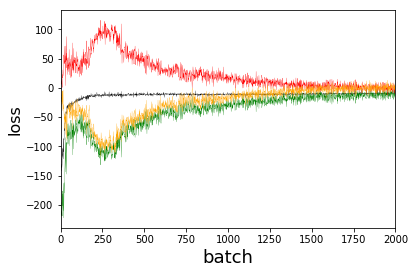

In [12]:
fig = plt.figure()
plt.plot([x[0] for x in gan.d_losses], color='black', linewidth=0.25)

plt.plot([x[1] for x in gan.d_losses], color='green', linewidth=0.25)
plt.plot([x[2] for x in gan.d_losses], color='red', linewidth=0.25)
plt.plot(gan.g_losses, color='orange', linewidth=0.25)

plt.xlabel('batch', fontsize=18)
plt.ylabel('loss', fontsize=16)

plt.xlim(0, 2000)
# plt.ylim(0, 2)

plt.show()